## Multiple Neutron Reflectivity calculations for polymer Brushes

Suppose that we want to compare the theoretical reflectivity of polymer brushes at the Quartz/d-toluene interface for different values of their thickness and grafting density. Polymer brushes have parabolic volume fraction profiles of the form: $\phi(z) = \phi(0) \left[ 1 - (\frac{z}{L})^2\right]$ where $\phi$ is the polymer volume fraction, $L$ is the brush extension and $z$ the distance from the substrate.

First let's import _anaklasis.ref_ and matplotlib that we will use later for plotting stuff.

In [1]:
from anaklasis import ref
import matplotlib.pyplot as plt

We name the project as 'none' which results in no pdf plots or ASCII file output beeing generated by _anaklasis_

In [2]:
project='none'

We then _lists_ related to the instrumental parameters.

In [3]:
resolution=[0.06] # dQ/Q=6%
background = [0.0] #no background
scale = [1.0]
qmax = [0.1]

Let's start building the model _list_ add to it the Quartz fronting semi-infinite layer.

In [4]:
model=[
	# rho irho depth sigma solv name
	[  4.32e-6, 0.0, 0, 5, 0.0, 'Quartz'],
	]

We will now append 50 slices representing the polymer brush. These layers will all have the same polymer sld and a varying solvent volume fraction ($1-\phi(z)$). For this reason we first define a symbolic expression for the solvent volume fraction.

In [5]:
expr='1-p0+(p0/(p1**2))*((p1/50)*(n-0.5))**2'

where p0 and p1 are global parameters (we will define them later) representing $\phi(0)$ and $L$. $n$ is the layer number that for our brush layer runs from 1 to 50. So the expression $(p1/50)*(n-0.5)$ gives the $z$ distance of each slice from the substrate. So now we append the slices of the brush in the model _list_ using a _for loop_.

In [6]:
for i in range(50): 
	model.append([ 1.41e-6, 0.0, 'p1/50', 'p1/100', expr, 'layer'])

All slices have the same sld, same thickness and we also apply a roughness (half slice thickness) to smooth the profile. The volume fraction profile is set according to the above defined symbolic expression.

We finally insert the semi-infinite backing layer (liquid d-toluene)

In [7]:
model.append([  5.86e-6, 0.0,  0, 0, 1.0, 'd-toluene'])

Since we have a single uniform path(model) on the substrate we define the _patch_ and _system_ _lists_ as

In [8]:
patches=[1.0]
system=[model]

Now we may define sets of global parameters

In [9]:
global_param_A = [
    # param value  description
	['p0', 0.20, 'phi0'],
	['p1', 700, 'brush_length'],
	]

global_param_B = [
    # param value  description
	['p0', 0.40, 'phi0'],
	['p1', 300, 'brush_length'],
	]

global_param_C = [
    # param value  description
	['p0', 0.10, 'phi0'],
	['p1', 1200, 'brush_length'],
	]

For each set of parameters we may call the _anaklasis.calculate_ function and store the results in _dictionaries_. Note that we set _plot=False_ since we do not need a summary plot to be exported.

In [10]:
results_A = ref.calculate(project, resolution, 
	patches, system, global_param_A, 
	background, scale, qmax, plot=False)

results_B = ref.calculate(project, resolution, 
	patches, system, global_param_B, 
	background, scale, qmax, plot=False)

results_C = ref.calculate(project, resolution, 
	patches, system, global_param_C, 
	background, scale, qmax, plot=False)

--------------------------------------------------------------------
Program ANAKLASIS - Calculation Module for X-ray/Neutron reflection 
version 1.5.0, August 2021
developed by Dr. Alexandros Koutsioumpas. JCNS @ MLZ
for bugs and requests contact: a.koutsioumpas[at]fz-juelich.de
--------------------------------------------------------------------


Instrumental Resolution, dQ/Q: 0.06
--------------------------------------------------------------------
Quartz real sld (10^-6 A^-2)      = 4.32 
Quartz imaginary sld (10^-6 A^-2) = 0.00 
Quartz thickness (A)              = 0.00 
Quartz/layer roughness (A) = 5.00 
Quartz solvent volume fraction    = 0.00 
--------------------------------------------------------------------
layer real sld (10^-6 A^-2)      = 1.41 
layer imaginary sld (10^-6 A^-2) = 0.00 
layer thickness (A)              = 14.00 (parametric), -> p1/50
layer/layer roughness (A) = 7.00 (parametric), -> p1/100
layer solvent volume fraction    = 0.80 (parametric), -> 1-p0+(p0/(p



Instrumental Resolution, dQ/Q: 0.06
--------------------------------------------------------------------
Quartz real sld (10^-6 A^-2)      = 4.32 
Quartz imaginary sld (10^-6 A^-2) = 0.00 
Quartz thickness (A)              = 0.00 
Quartz/layer roughness (A) = 5.00 
Quartz solvent volume fraction    = 0.00 
--------------------------------------------------------------------
layer real sld (10^-6 A^-2)      = 1.41 
layer imaginary sld (10^-6 A^-2) = 0.00 
layer thickness (A)              = 6.00 (parametric), -> p1/50
layer/layer roughness (A) = 3.00 (parametric), -> p1/100
layer solvent volume fraction    = 0.60 (parametric), -> 1-p0+(p0/(p1**2))*((p1/50)*(n-0.5))**2
--------------------------------------------------------------------
layer real sld (10^-6 A^-2)      = 1.41 
layer imaginary sld (10^-6 A^-2) = 0.00 
layer thickness (A)              = 6.00 (parametric), -> p1/50
layer/layer roughness (A) = 3.00 (parametric), -> p1/100
layer solvent volume fraction    = 0.60 (parametric)



Instrumental Resolution, dQ/Q: 0.06
--------------------------------------------------------------------
Quartz real sld (10^-6 A^-2)      = 4.32 
Quartz imaginary sld (10^-6 A^-2) = 0.00 
Quartz thickness (A)              = 0.00 
Quartz/layer roughness (A) = 5.00 
Quartz solvent volume fraction    = 0.00 
--------------------------------------------------------------------
layer real sld (10^-6 A^-2)      = 1.41 
layer imaginary sld (10^-6 A^-2) = 0.00 
layer thickness (A)              = 24.00 (parametric), -> p1/50
layer/layer roughness (A) = 12.00 (parametric), -> p1/100
layer solvent volume fraction    = 0.90 (parametric), -> 1-p0+(p0/(p1**2))*((p1/50)*(n-0.5))**2
--------------------------------------------------------------------
layer real sld (10^-6 A^-2)      = 1.41 
layer imaginary sld (10^-6 A^-2) = 0.00 
layer thickness (A)              = 24.00 (parametric), -> p1/50
layer/layer roughness (A) = 12.00 (parametric), -> p1/100
layer solvent volume fraction    = 0.90 (paramet

the three _dictionaries_ contain _NumPy_ arrays corresponding to calculated reflectivity, sld and solvent profile. We may use the appropriate _dictionary_ 'keys' to produce a plot for the reflectivity of the three systems.

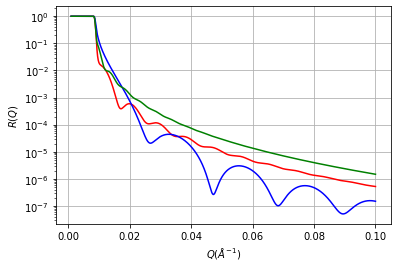

In [11]:
plt.figure()
plt.plot(results_A[("reflectivity")][:,0],results_A[("reflectivity")][:,1],color='red')
plt.plot(results_B[("reflectivity")][:,0],results_B[("reflectivity")][:,1],color='blue')
plt.plot(results_C[("reflectivity")][:,0],results_C[("reflectivity")][:,1],color='green')
plt.yscale('log')
plt.xlabel(r'$Q(\AA^{-1})$')
plt.ylabel(r'$R(Q)$')
plt.grid(True)
plt.draw()

we may do the same for the sld profiles that are stored in the _dictionary_. 

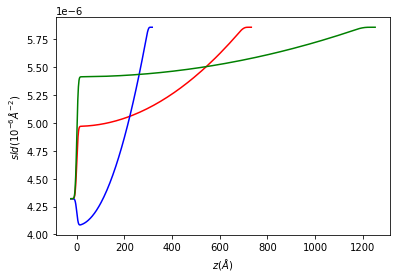

In [12]:
plt.figure()
plt.plot(results_A[("profile")][:,0],results_A[("profile")][:,1],color='red')
plt.plot(results_B[("profile")][:,0],results_B[("profile")][:,1],color='blue')
plt.plot(results_C[("profile")][:,0],results_C[("profile")][:,1],color='green')
plt.xlabel(r'$z(\AA)$')
plt.ylabel(r'$sld(10^{-6}\AA^{-2})$')
plt.draw()

We do the same for the solvent volume fraction profile of the 3 brushes that is contained in the returned _dictionaries_.

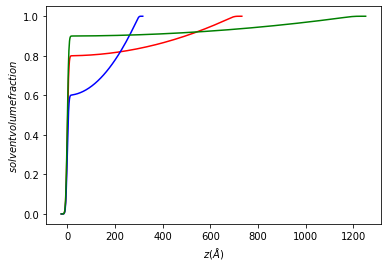

In [13]:
plt.figure()
plt.plot(results_A[("solvent")][:,0],results_A[("solvent")][:,1],color='red')
plt.plot(results_B[("solvent")][:,0],results_B[("solvent")][:,1],color='blue')
plt.plot(results_C[("solvent")][:,0],results_C[("solvent")][:,1],color='green')
plt.xlabel(r'$z(\AA)$')
plt.ylabel(r'$solvent volume fraction$')
plt.draw()